In [ ]:
zip_path = '/content/drive/My\ Drive/Datasets/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

# !rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.RMSprop(learning_rate=0.001)
# opt = SGD(lr=0.001, momentum=0.9)
# opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)            

In [ ]:
dataset_dir = '/content/santa-dataset'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=60, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=60, target_size=(200, 200))

# train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
# test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=75)

Epoch 1/75
12/12 [==============================] - 69s 6s/step - loss: 27.2482 - accuracy: 0.5438 - val_loss: 0.6236 - val_accuracy: 0.5000
Epoch 2/75
12/12 [==============================] - 67s 6s/step - loss: 0.5934 - accuracy: 0.6903 - val_loss: 0.7657 - val_accuracy: 0.5192
Epoch 3/75
12/12 [==============================] - 68s 6s/step - loss: 0.5141 - accuracy: 0.7855 - val_loss: 0.5036 - val_accuracy: 0.8462
Epoch 4/75
12/12 [==============================] - 67s 6s/step - loss: 0.6104 - accuracy: 0.7175 - val_loss: 0.5009 - val_accuracy: 0.7308
Epoch 5/75
12/12 [==============================] - 70s 6s/step - loss: 0.7470 - accuracy: 0.7961 - val_loss: 0.4432 - val_accuracy: 0.8308
Epoch 6/75
12/12 [==============================] - 66s 5s/step - loss: 0.6325 - accuracy: 0.7885 - val_loss: 0.7764 - val_accuracy: 0.6462
Epoch 7/75
12/12 [==============================] - 73s 6s/step - loss: 0.4327 - accuracy: 0.8323 - val_loss: 1.0126 - val_accuracy: 0.7308
Epoch 8/75
12/12 [=

In [ ]:
history_df = pd.DataFrame(history_base_model.history)
history_df['epoch'] = history_base_model.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,27.248247,0.543807,0.623620,0.500000,0
1,0.593394,0.690332,0.765692,0.519231,1
2,0.514066,0.785498,0.503599,0.846154,2
3,0.610389,0.717523,0.500943,0.730769,3
4,0.746959,0.796072,0.443161,0.830769,4
...,...,...,...,...,...
70,0.190178,0.950151,1.774414,0.803846,70
71,0.079790,0.977341,0.602312,0.926923,71
72,0.014540,0.996979,0.578455,0.930769,72
73,0.013237,0.993958,0.775171,0.915385,73


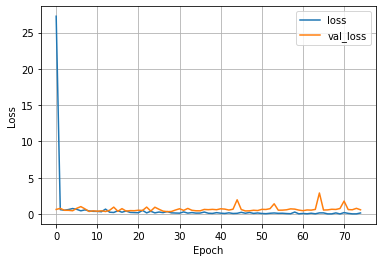

In [ ]:
plot_loss(history_base_model)

Hasil terbaik model ini

---

Epoch 75/75 [==============================] - 67s 6s/step - loss: 0.1362 - accuracy: 0.9698 - val_loss: 0.5711 - val_accuracy: 0.9423